In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.head().style.set_properties(**{'background-color': '#873600',
                                          'color': '#E2EEF3'})

In [3]:
df.shape

(1000, 17)

In [4]:
df.size

17000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.notnull().sum()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [8]:
df.describe().style.background_gradient(cmap='Oranges')

In [9]:
df.describe(include='O').style.set_properties(**{'background-color': '#873600','color': '#E2EEF3'})

In [10]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [11]:
# Exploracion de los datos
df[["Quantity","Product line"]].groupby(["Product line"]).mean().sort_values( ["Quantity"] , ascending = False).style.background_gradient(cmap='Oranges')

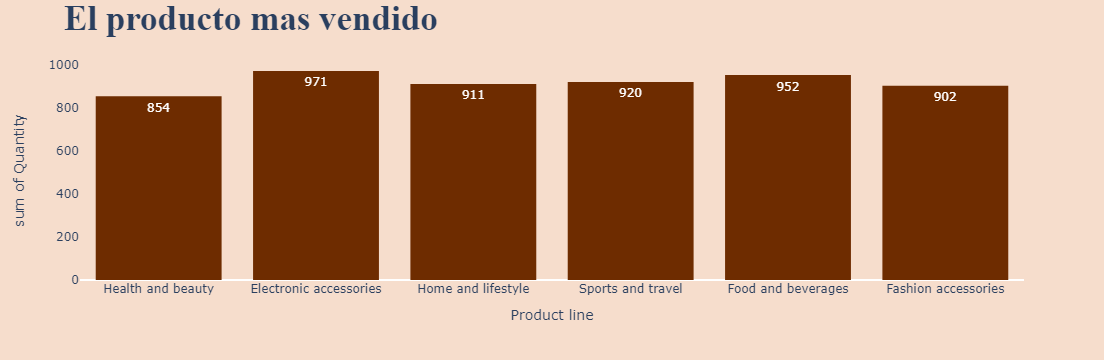

In [12]:
fig = px.histogram (df, x = "Product line" , y="Quantity" , color_discrete_sequence=['#6E2C00'] , text_auto = True)
fig.update_layout(title = "<b> El producto mas vendido <b>" , title_font = {"size":35,'family': 'Serif'},paper_bgcolor='#F6DDCC',plot_bgcolor='#F6DDCC')
fig.update_yaxes (showgrid = False)
fig.show()
    

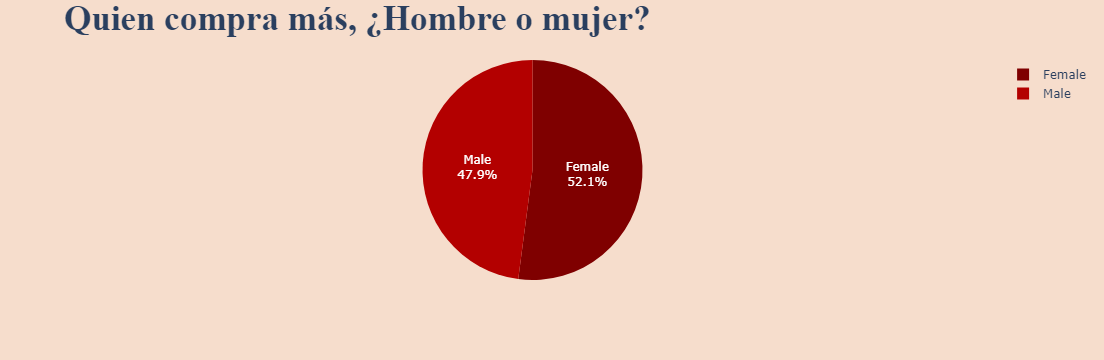

In [13]:
# ¿Quien compro mas hombre o mujer?
fig = px.pie( df , values = "Quantity" , names = "Gender" , hover_data = ["Quantity","Gender"], labels = {"Gender" : "Gender"}, color_discrete_sequence=px.colors.sequential.OrRd_r)
fig.update_traces(textposition = "inside" , textinfo = "percent+label")
fig.update_layout( title = "<b> Quien compra más, ¿Hombre o mujer? <b>", title_font = {"size":35,'family': 'Serif'},paper_bgcolor='#F6DDCC',plot_bgcolor='#F6DDCC')
fig.show()


<Axes: title={'center': 'Intereses de los hombres'}, xlabel='Product line,Gender'>

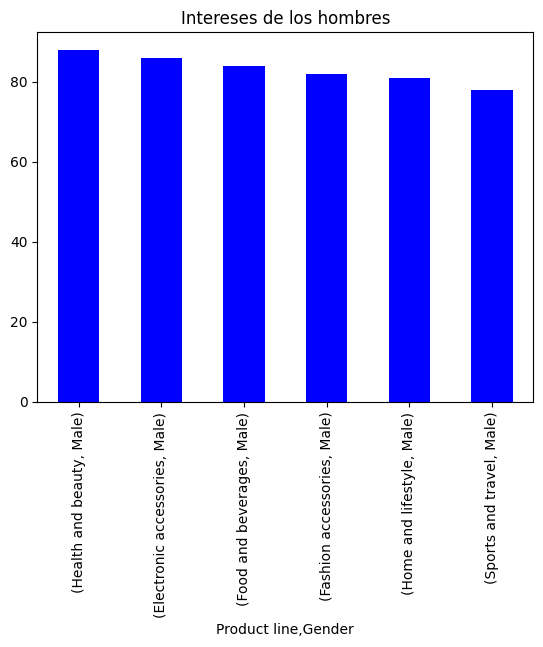

In [14]:
#Producto mas demandados por hombres.
df[["Product line" , "Gender"]][(df["Gender"] == "Male")].value_counts().plot( kind = "bar" , color = "blue", title = "Intereses de los hombres")

<Axes: title={'center': 'Intereses de las mujeres'}, xlabel='Product line,Gender'>

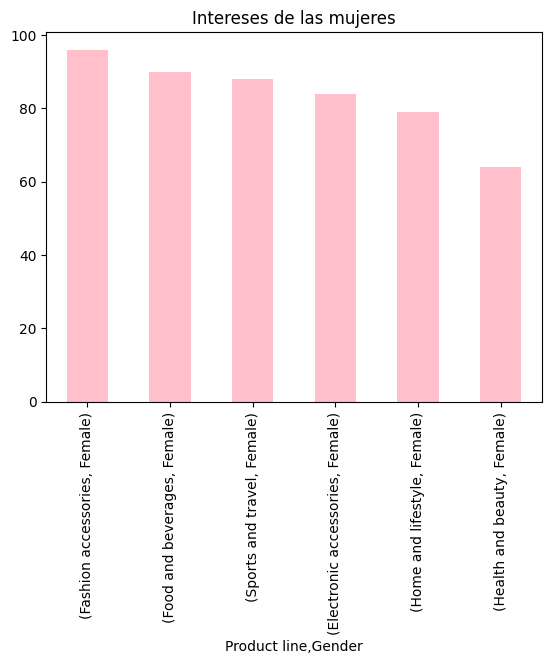

In [15]:
df[["Product line" , "Gender"]][(df["Gender"] == "Female")].value_counts().plot( kind = "bar" , color = "pink", title = "Intereses de las mujeres")

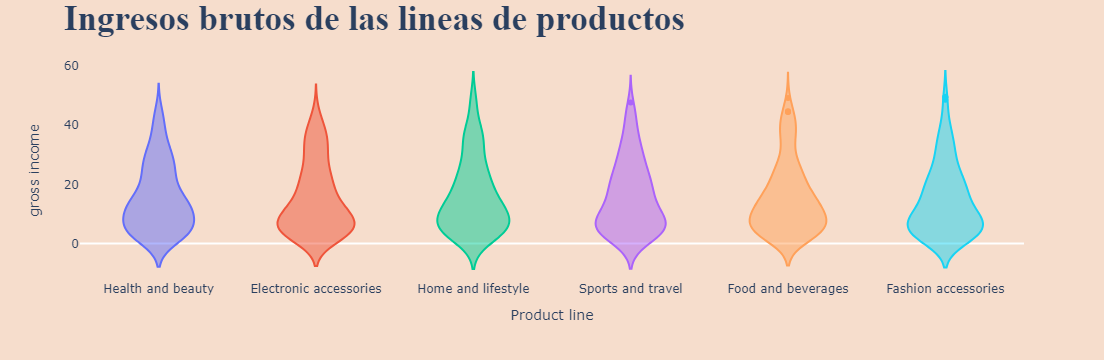

In [16]:
# Generar un grafico violin para ver que linea de productos genera mas ingresos brutos.
fig = px.violin ( df, x = "Product line" , y = "gross income" , color = "Product line")
fig.update_layout( title = "<b> Ingresos brutos de las lineas de productos <b>", title_font = {"size":35,'family': 'Serif'}, showlegend = False , paper_bgcolor ='#F6DDCC', plot_bgcolor = '#F6DDCC')
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.show()

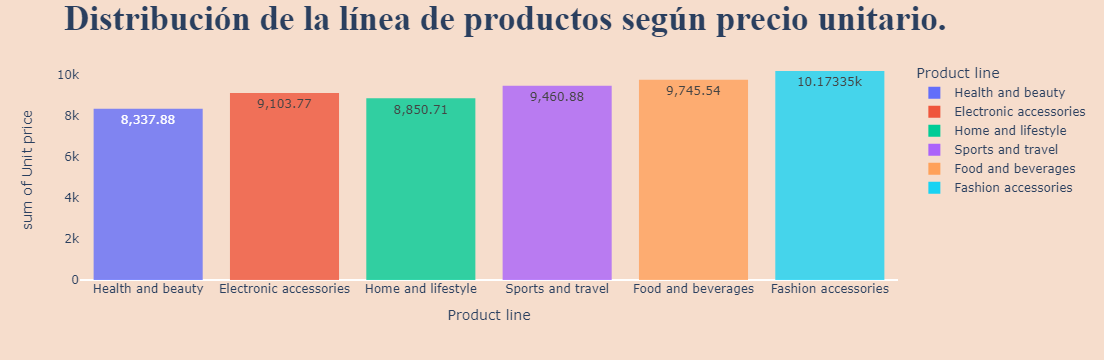

In [17]:
fig = px.histogram( df, x = "Product line" , y = "Unit price" , color = "Product line", nbins = 5 , text_auto=True,opacity=.8)
fig.update_layout( title = "<b> Distribución de la línea de productos según precio unitario. <b>",title_font={'size':35,'family': 'Serif'},paper_bgcolor='#F6DDCC',
                  plot_bgcolor='#F6DDCC')
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.show()


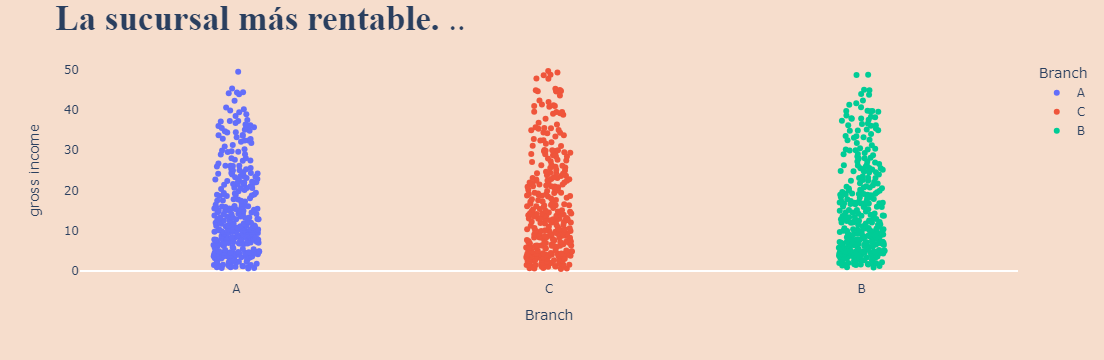

In [18]:
fig = px.strip( df, x = "Branch" , y = "gross income" , color = "Branch")
fig.update_layout(title='<b>La sucursal más rentable. </b>..',
                  title_font={'size':35,'family': 'Serif'},
                  paper_bgcolor='#F6DDCC',
                  plot_bgcolor='#F6DDCC')
fig.update_yaxes(showgrid = False)
fig.show()

In [19]:
#Compra en las diferentes sucursales con respecto a Gender.
df.pivot_table( index = "Branch" , columns = "Gender" , values = "cogs" , aggfunc = "count").style.background_gradient(cmap='Oranges')

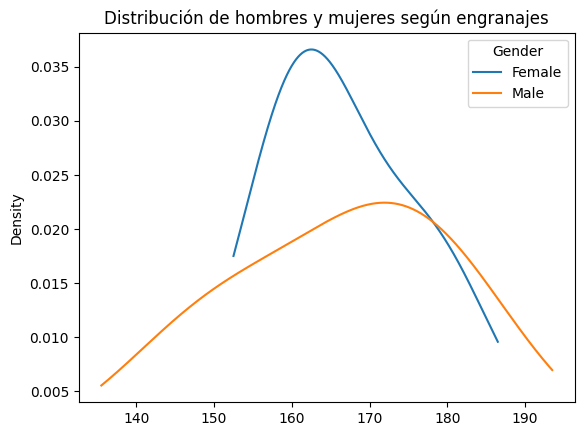

In [20]:
df.pivot_table(index = "Branch" , columns = "Gender", values = "cogs", aggfunc = "count").plot( kind = "kde", title = "Distribución de hombres y mujeres según engranajes")
plt.show()

In [21]:
df.pivot_table( index = "Product line" , columns = "Branch" , values = "cogs" , aggfunc = "max").style.background_gradient(cmap='Oranges')

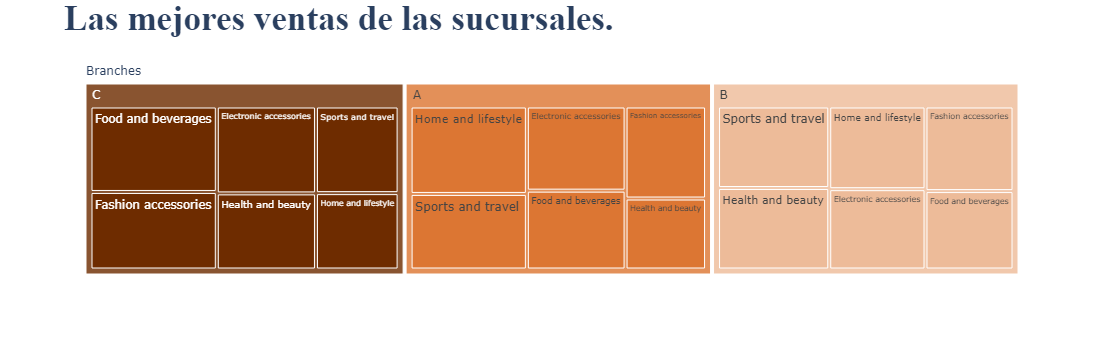

In [22]:
fig = px.treemap ( df , path = [px.Constant("Branches") , "Branch" , "Product line"], values = "cogs" , color_discrete_sequence=['#6E2C00','#DC7633','#EDBB99'])
fig.update_layout (title = "<b> Las mejores ventas de las sucursales. <b>",  titlefont={'size': 35,'family': 'Serif'})
fig.show()

<Axes: title={'center': 'Intereses de los miembros'}, xlabel='Product line'>

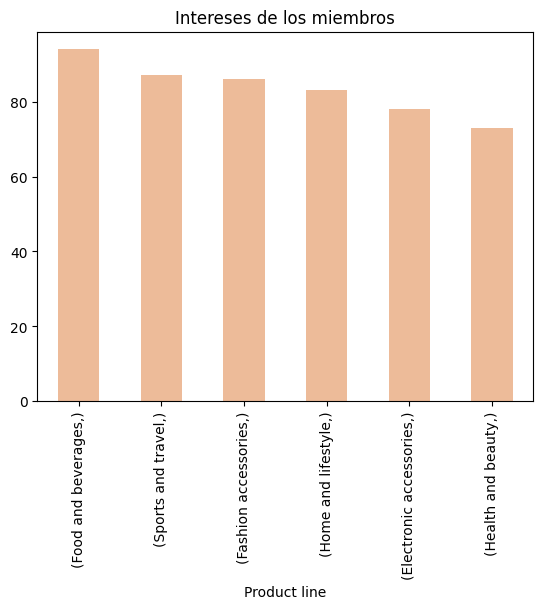

In [23]:
df[["Product line"]][(df["Customer type"] == "Member")].value_counts().plot(kind = "bar" , color='#EDBB99', title = "Intereses de los miembros")

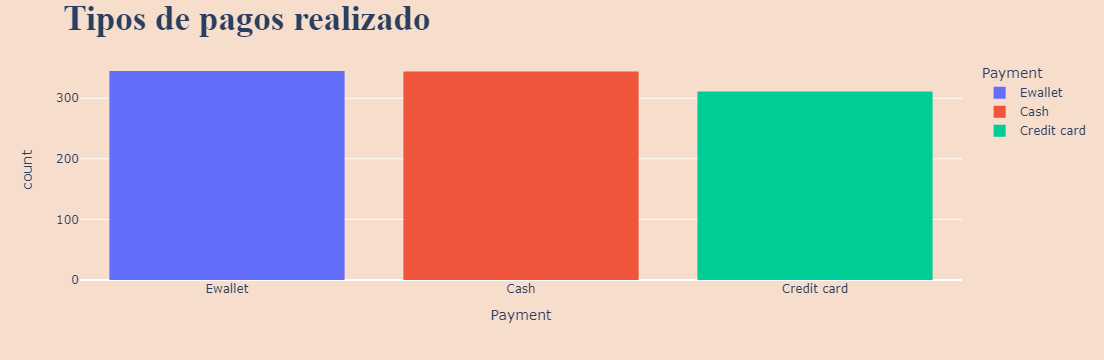

In [24]:
fig = px.histogram ( df, x = "Payment" , color = "Payment")
fig.update_layout( title = "<b> Tipos de pagos realizado <b>" , title_font={'size':35,'family': 'Serif'},
                  paper_bgcolor='#F6DDCC',
                  plot_bgcolor='#F6DDCC')
fig.show()

In [25]:
# Trnasformacion de datos a tiempo.df["Date"]
df["Date"]= pd.to_datetime(df["Date"])

In [26]:
df.insert(10,"month",df.Date.dt.month)

In [27]:
df.insert(11,"day",df.Date.dt.day)

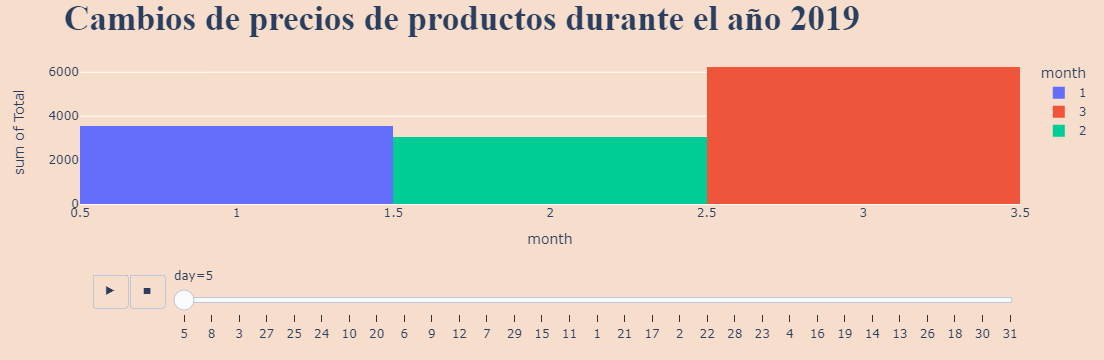

In [28]:
fig = px.histogram ( df, x= "month" , y = "Total" , color = "month" , animation_frame = "day" , hover_data = ["Product line" , "Gender"])
fig.update_layout( title = "<b> Cambios de precios de productos durante el año 2019 <b>" , title_font = {'size':35,'family': 'Serif'},
                  paper_bgcolor='#F6DDCC',
                  plot_bgcolor='#F6DDCC')
fig.show()

In [29]:
# Pre-proceso de datos.
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
month                      0
day                        0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [30]:
df.notnull().sum()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
month                      1000
day                        1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

<Axes: >

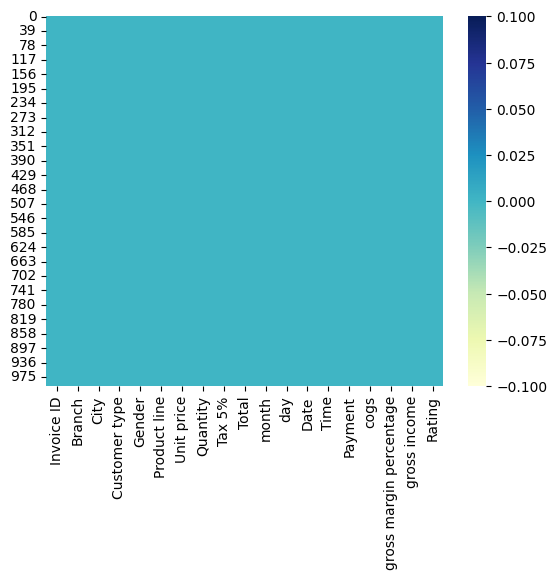

In [31]:
sns.heatmap(df.isna(),cmap = "YlGnBu")

In [32]:
df.drop(["Invoice ID" , "Time" , "Date"] , axis= 1, inplace = True)

In [33]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'month', 'day', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
LE=LabelEncoder()
categorias = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for label in categorias:
    df[label]= LE.fit_transform(df[label])

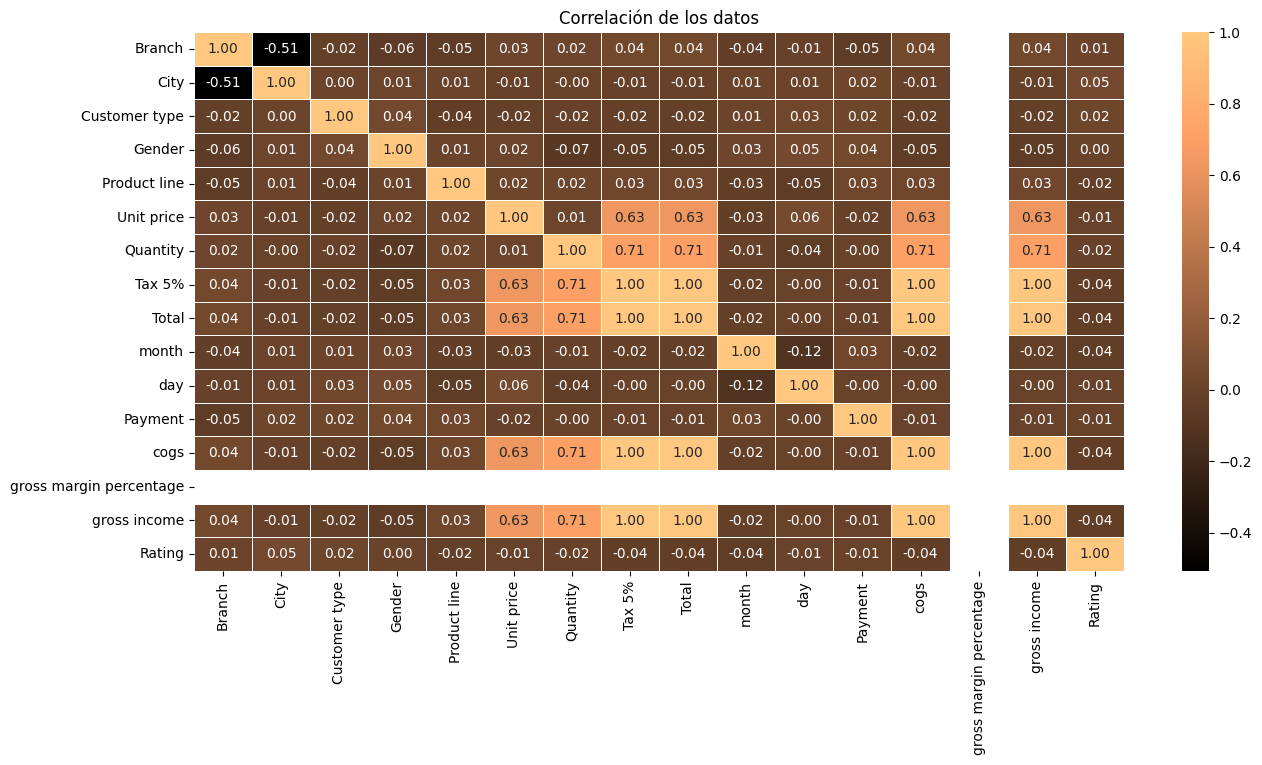

In [36]:
correlacion = df.corr()
plt.figure( figsize = (15,7))
sns.heatmap(correlacion, annot = True, fmt = ".2f", annot_kws = {"size":10}, linewidths = 0.5, cmap = "copper")
plt.title ("Correlación de los datos")
plt.show()

In [37]:
# División de datos.
from sklearn.model_selection import train_test_split

In [38]:
x = df.drop ( ["Total"] , axis =1 )
y = df["Total"]
print("El tamaño de las variables X:" , x.shape)
print("El tamaño de las variables Y:" , y.shape)

El tamaño de las variables X: (1000, 15)
El tamaño de las variables Y: (1000,)


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .33 , random_state = 42, shuffle = True)

In [40]:
print("El tamaño de x_train:" , x_train.shape)
print("El tamaño de x_test:" , x_test.shape)
print("El tamaño de y_train:" , y_train.shape)
print("El tamaño de y_test:" , y_test.shape)

El tamaño de x_train: (670, 15)
El tamaño de x_test: (330, 15)
El tamaño de y_train: (670,)
El tamaño de y_test: (330,)


In [41]:
#Modelado del dataset, predecir el total con un conjuntos de modelos son 4 en total:
# (1) LinearRegressor (2) XGBRegressor (3) CatBoostRegression (4) GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [42]:
LR = LinearRegression ().fit(x_train,y_train)

In [43]:
print(f"Puntaje del LR con datos de entrenamiento :",round(LR.score(x_train,y_train),4)*100)
print(f"Puntaje de LR con datos de prueba:" , round(LR.score(x_test, y_test),4)*100)

Puntaje del LR con datos de entrenamiento : 100.0
Puntaje de LR con datos de prueba: 100.0


In [44]:
LR_y_predic = LR.predict(x_test)

In [45]:
from xgboost import XGBRegressor

In [46]:
xgb = XGBRegressor().fit(x_train , y_train)

In [47]:
print (f"XGB puntación con datos entrenamiento:", round(xgb.score(x_train,y_train),4)*100)
print (f"XGB puntación con datos de prueba:" , round(xgb.score(x_test,y_test),4)*100)

XGB puntación con datos entrenamiento: 100.0
XGB puntación con datos de prueba: 99.92999999999999


In [48]:
xgb_y_predic = xgb.predict(x_test)

In [49]:
from catboost import CatBoostRegressor

In [50]:
catboost = CatBoostRegressor(verbose=False).fit(x_train,y_train)

In [51]:
print(f"Puntaje de catboost con datos de entremamiento:", round(catboost.score(x_train,y_train),4)*100)
print(f"Puntaje de catboost con datos de prueba:", round(catboost.score(x_test,y_test),4)*100)

Puntaje de catboost con datos de entremamiento: 100.0
Puntaje de catboost con datos de prueba: 99.89


In [52]:
catboost_y_predic = catboost.predict(x_test)

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
Gradientboost = GradientBoostingRegressor().fit(x_train,y_train)

In [55]:
print(f"El puntaje de GradientBoostingRegressor con datos de entrenamiento:" , round(Gradientboost.score(x_train,y_train),4)*100)
print(f'El puntaje de GradientBoostingRegressor con datos de prueba:', round(Gradientboost.score(x_test,y_test),4)*100)

El puntaje de GradientBoostingRegressor con datos de entrenamiento: 100.0
El puntaje de GradientBoostingRegressor con datos de prueba: 99.99


In [56]:
Gradientboost_y_predic = Gradientboost.predict(x_test)

In [57]:
#Evaluación de los 4 modelos.
from sklearn.metrics import mean_absolute_error , mean_squared_error, median_absolute_error

In [59]:
models_predictions={'LR':LR_y_predic,'xgb':xgb_y_predic,'CBR':catboost_y_predic,'GBR':Gradientboost_y_predic}
metrics={'mean_absolute_error':mean_absolute_error,'mean_squared_error':mean_squared_error,'median_absolute_error':median_absolute_error}

for model,y_pred in models_predictions.items():
    print(model,'Model :-','\n')
    for m,metric in metrics.items():
        MetricValue = round(metric(y_test, y_pred),2)
        print( m ,' Value is : ',MetricValue,'\n\n')

LR Model :- 

mean_absolute_error  Value is :  0.0 


mean_squared_error  Value is :  0.0 


median_absolute_error  Value is :  0.0 


xgb Model :- 

mean_absolute_error  Value is :  3.01 


mean_squared_error  Value is :  46.98 


median_absolute_error  Value is :  1.89 


CBR Model :- 

mean_absolute_error  Value is :  4.62 


mean_squared_error  Value is :  68.25 


median_absolute_error  Value is :  2.91 


GBR Model :- 

mean_absolute_error  Value is :  1.63 


mean_squared_error  Value is :  4.82 


median_absolute_error  Value is :  1.2 




In [60]:
import shap

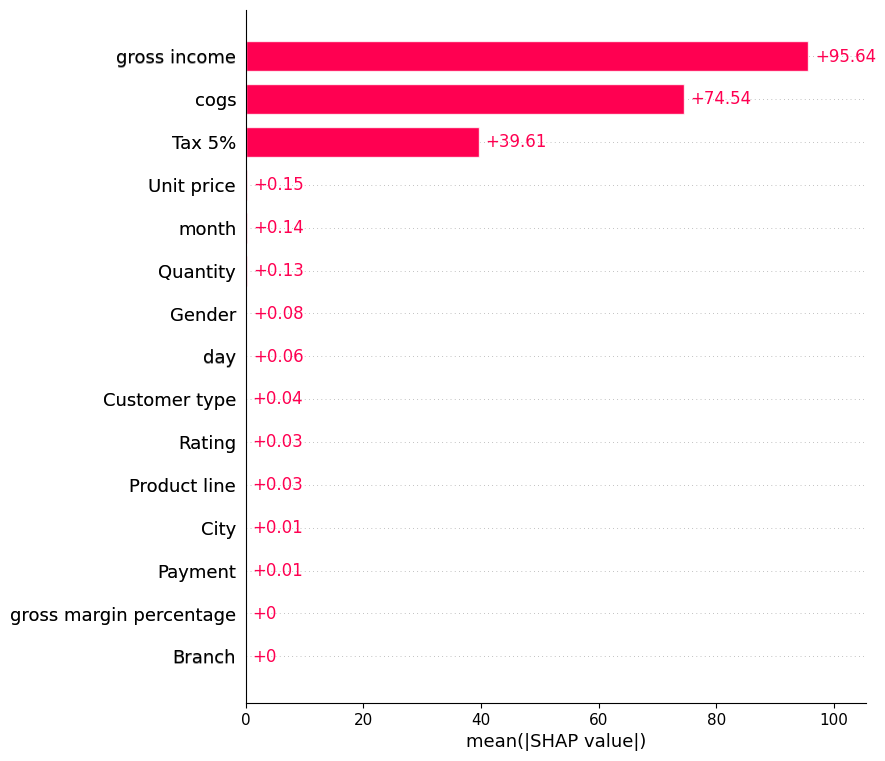

In [64]:
explainer= shap.Explainer(Gradientboost)
shap_values = explainer(x_test)
shap.plots.bar(shap_values,max_display = 15)